In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exploration_rate        = 1.0           # epsilon_0
max_exploration_rate    = 1.0           # epsilon_max
min_exploration_rate    = 0.001         # epsilon_min
exploration_decay_rate  = 0.001         # epsilon = epsilon_min * exp(-decay * time)

discount_rate           = 0.99          # gamma
learning_rate           = 0.1           # alpha

num_episodes            = 10_000        # total number of episodes
max_steps_per_episode   = 100           # maximum number of steps per episode

In [3]:
number_of_states = 100
no_of_actions = 3

q_table = np.zeros((number_of_states, no_of_actions))
print(q_table.shape)

(100, 3)


In [4]:
action_spaces = np.array([0.0, 0.1, -0.1])

dt = 0.01
delta_alt_prev = 0

final_altitude = 40

In [5]:
def sigmoid(x):
    denom = 1 + np.exp(-x)
    return (1/denom)

In [6]:
def get_state(err):
    sig_err = sigmoid(err)
    return int(sig_err * 100)

In [7]:
def get_error(delta_alt):
    delta_d = delta_alt - delta_alt_prev
    v = delta_d / dt
    e = delta_alt + v
    return e

In [8]:
def get_reward(err):
    if (err < 0.01):
        return 1
    elif (err < 0.1):
        return 0
    elif (err < 1):
        return -1
    else:
        return -2

In [9]:
def get_closest_action_idx(action):
    if (action < -0.5):
        return 2
    elif (action < 0.5):
        return 1
    else:
        return 0

In [10]:
rewards_all_episodes = []
steps_required = []

for episode in range(num_episodes):
    state = 0
    flag = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        exploration_rate_threshold = np.random.uniform()
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = np.random.choice(action_spaces)
        
        err = get_error(-action)
        reward = get_reward(err)
        new_state = get_state(err)

        idx = get_closest_action_idx(action)

        q_table[state, idx] = q_table[state, idx]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward
        delta_alt_prev = action

        if (flag == False):
            if (state > 98):
                steps_required.append(step)
                flag = True
    
    if (flag == False):
        steps_required.append(max_steps_per_episode)
    
    exploration_rate = min_exploration_rate + (max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

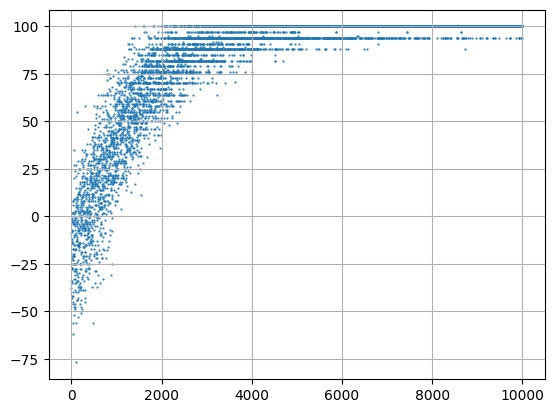

In [11]:
plt.scatter(range(len(rewards_all_episodes)), rewards_all_episodes, s=0.3)
plt.grid()
plt.show()

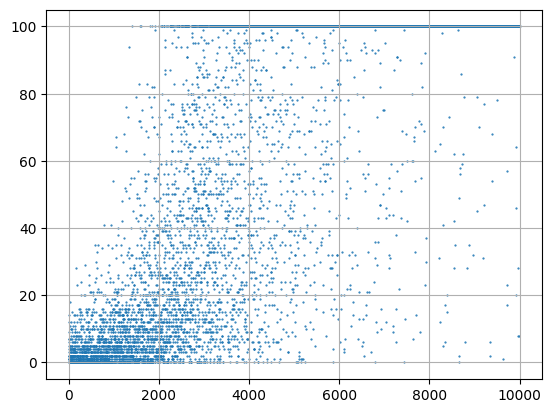

In [12]:
plt.scatter(range(len(steps_required)), steps_required, s=0.3)
plt.grid()
plt.show()